<a href="https://colab.research.google.com/github/aimldlnlp/heart-disease-classification-with-kan/blob/main/heart_disease_classification_with_kan.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Setup

In [1]:
!pip install imodelsx

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 115.5/115.5 kB 2.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 243.1/243.1 kB 11.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 14.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 11.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 10.7 MB/s eta 0:00:00
  Created wheel for dict-hash: filename=dict_hash-1.3.6-py3-none-any.whl size=11006 sha256=fb4390de734f2c537542d518c1cd25b9adc67c75de3f9260a30fcd1926d1a27c
  Stored in directory: /root/.cache/pip/wheels/50/52/8a/2f937416e8871f2fa3ecbb59ae7cbdce303fdf84c4e19e7044
  Created wheel for deflate_dict: filename=deflate_dict-1.2.2-py3-none-any.whl size=7954 sh

In [19]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from imodelsx import KANClassifier
from mpl_toolkits.axes_grid1 import make_axes_locatable
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [4]:
df = pd.read_csv("/content/heart_disease.csv")

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [5]:
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age,sex,chest pain type,resting bp s,cholesterol,fasting blood sugar,resting ecg,max heart rate,exercise angina,oldpeak,ST slope,target
0,40,1,2,140,289,0,0,172,0,0.0,1,0
1,49,0,3,160,180,0,0,156,0,1.0,2,1
2,37,1,2,130,283,0,1,98,0,0.0,1,0
3,48,0,4,138,214,0,0,108,1,1.5,2,1
4,54,1,3,150,195,0,0,122,0,0.0,1,0


### Data visualization

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


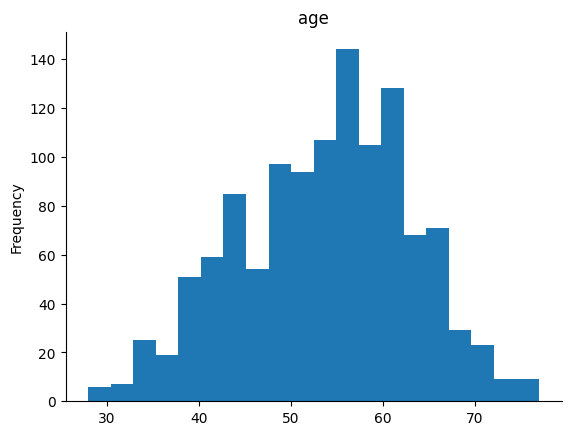

In [6]:
df['age'].plot(kind='hist', bins=20, title='age')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


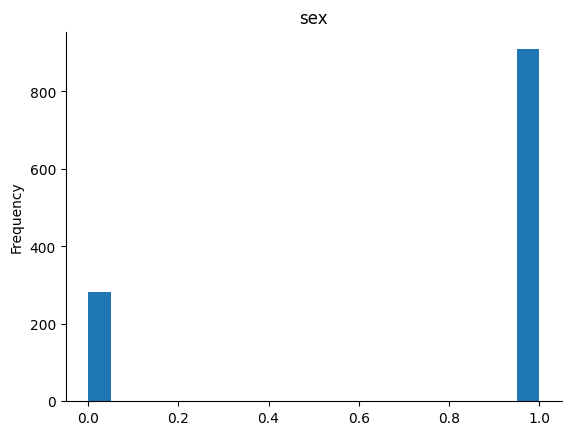

In [7]:
df['sex'].plot(kind='hist', bins=20, title='sex')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


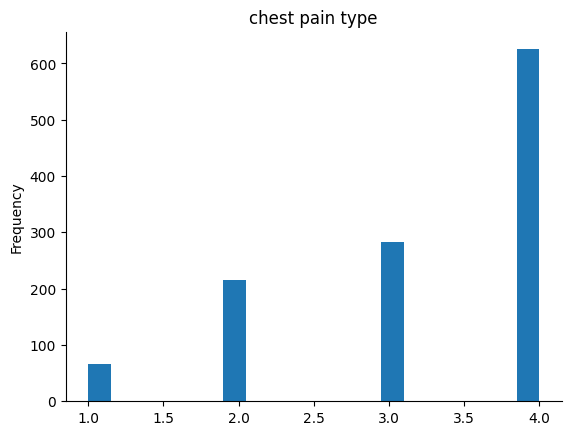

In [8]:
df['chest pain type'].plot(kind='hist', bins=20, title='chest pain type')
plt.gca().spines[['top', 'right',]].set_visible(False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


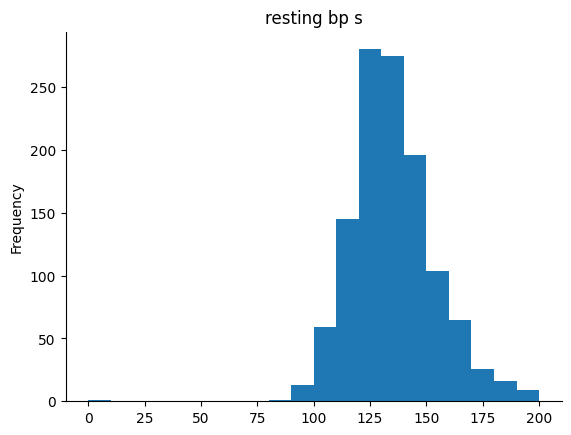

In [9]:
df['resting bp s'].plot(kind='hist', bins=20, title='resting bp s')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [10]:
X = df.iloc[:, :-1]
y = df.iloc[:, -1]
scaler = StandardScaler()
X = scaler.fit_transform(X)
X

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


array([[-1.46672783,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       [-0.50460037, -1.79857595, -0.24893198, ..., -0.79521891,
         0.07111913,  0.61558278],
       [-1.78743698,  0.55599543, -1.31835093, ..., -0.79521891,
        -0.84979236, -1.02321701],
       ...,
       [ 0.35062404,  0.55599543,  0.82048698, ...,  1.25751537,
         0.25530143,  0.61558278],
       [ 0.35062404, -1.79857595, -1.31835093, ..., -0.79521891,
        -0.84979236,  0.61558278],
       [-1.68053393,  0.55599543, -0.24893198, ..., -0.79521891,
        -0.84979236, -1.02321701]])

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(952, 11)
(238, 11)
(952,)
(238,)


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


### KAN implementation without hyper-parameter tuning

In [13]:
model = KANClassifier(device='cuda')
model = model.fit(X_train, y_train)
y_pred = model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 100/100 [00:04<00:00, 22.12it/s]


In [15]:
print("Test accuracy:", accuracy_score(y_test, y_pred))

Test accuracy: 0.726890756302521


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
print("Classificcation report for test set: ", classification_report(y_test, y_pred))

Classificcation report for test set:                precision    recall  f1-score   support

           0       0.88      0.46      0.60       107
           1       0.68      0.95      0.79       131

    accuracy                           0.73       238
   macro avg       0.78      0.70      0.70       238
weighted avg       0.77      0.73      0.71       238



/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [20]:
print("Kappa score:", cohen_kappa_score(y_test, y_pred))

Kappa score: 0.42297650130548303


In [21]:
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Confusion matrix:
 [[ 49  58]
 [  7 124]]


### KAN implementation with hyper-parameter tuning

In [22]:
hidden_layers =  [32, 64]
activations = [0.1, 0.3]
entropies = [0.1, 0.3]
ridges = [0.1, 0.3]

In [23]:
for hidden_layer in hidden_layers:
  for activation in activations:
    for entropy in entropies:
      for ridge in ridges:
        kan_model = KANClassifier(hidden_layer=hidden_layer, activation=activation, entropy=entropy, ridge=ridge, device='cuda')
        kan_model.fit(X_train, y_train)
        y_pred = kan_model.predict(X_test)
        print("Hidden layer:", hidden_layer)
        print("Activation:", activation)
        print("Entropy:", entropy)
        print("Ridge:", ridge)
        print("Test accuracy:", accuracy_score(y_test, y_pred))
        print("Kappa score:", cohen_kappa_score(y_test, y_pred))
        print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

100%|██████████| 100/100 [00:02<00:00, 39.89it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Test accuracy: 0.7647058823529411
Kappa score: 0.5188100223842878
Confusion matrix:
 [[ 72  35]
 [ 21 110]]


100%|██████████| 100/100 [00:02<00:00, 47.37it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Test accuracy: 0.7394957983193278
Kappa score: 0.45785876993166286
Confusion matrix:
 [[ 59  48]
 [ 14 117]]


100%|██████████| 100/100 [00:04<00:00, 20.16it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Test accuracy: 0.7857142857142857
Kappa score: 0.5536515407810547
Confusion matrix:
 [[ 64  43]
 [  8 123]]


 58%|█████▊    | 58/100 [00:02<00:01, 27.20it/s]


	Early stopping
Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Test accuracy: 0.7226890756302521
Kappa score: 0.4328832406671962
Confusion matrix:
 [[ 67  40]
 [ 26 105]]


 54%|█████▍    | 54/100 [00:01<00:00, 51.97it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Test accuracy: 0.7521008403361344
Kappa score: 0.48725626232381514
Confusion matrix:
 [[ 64  43]
 [ 16 115]]


100%|██████████| 100/100 [00:01<00:00, 52.98it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Test accuracy: 0.6134453781512605
Kappa score: 0.17665638865909605
Confusion matrix:
 [[ 31  76]
 [ 16 115]]


100%|██████████| 100/100 [00:01<00:00, 52.11it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Test accuracy: 0.7478991596638656
Kappa score: 0.4762708134673219
Confusion matrix:
 [[ 61  46]
 [ 14 117]]


 57%|█████▋    | 57/100 [00:01<00:00, 49.73it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Test accuracy: 0.7773109243697479
Kappa score: 0.5457688152682751
Confusion matrix:
 [[ 75  32]
 [ 21 110]]


100%|██████████| 100/100 [00:02<00:00, 35.50it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Test accuracy: 0.7605042016806722
Kappa score: 0.49759277090585885
Confusion matrix:
 [[ 57  50]
 [  7 124]]


100%|██████████| 100/100 [00:01<00:00, 52.65it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Test accuracy: 0.6260504201680672
Kappa score: 0.21414261334124807
Confusion matrix:
 [[ 40  67]
 [ 22 109]]


100%|██████████| 100/100 [00:01<00:00, 53.07it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Test accuracy: 0.7605042016806722
Kappa score: 0.4993726474278545
Confusion matrix:
 [[ 59  48]
 [  9 122]]


100%|██████████| 100/100 [00:02<00:00, 45.23it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Test accuracy: 0.6722689075630253
Kappa score: 0.3131058980241248
Confusion matrix:
 [[ 47  60]
 [ 18 113]]


100%|██████████| 100/100 [00:01<00:00, 52.69it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Test accuracy: 0.7521008403361344
Kappa score: 0.4925923249259232
Confusion matrix:
 [[ 70  37]
 [ 22 109]]


 54%|█████▍    | 54/100 [00:01<00:00, 51.32it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Test accuracy: 0.7563025210084033
Kappa score: 0.4901381399128315
Confusion matrix:
 [[ 58  49]
 [  9 122]]


 56%|█████▌    | 56/100 [00:01<00:01, 32.59it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Test accuracy: 0.8025210084033614
Kappa score: 0.5978862606945143
Confusion matrix:
 [[ 79  28]
 [ 19 112]]


100%|██████████| 100/100 [00:02<00:00, 37.48it/s]

Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Test accuracy: 0.6554621848739496
Kappa score: 0.30975454481148756
Confusion matrix:
 [[71 36]
 [46 85]]


In [25]:
hidden_layers = [32, 64, 128]
activations = [0.1, 0.3, 0.5]
entropies = [0.1, 0.3, 0.5]
ridges = [0.1, 0.3, 0.5, 0.7]
splineOrder = [3, 5]

In [27]:
for hidden_layer in hidden_layers:
  for activation in activations:
    for entropy in entropies:
      for ridge in ridges:
        for spline in splineOrder:
          kan_model = KANClassifier(hidden_layer=hidden_layer, activation=activation, entropy=entropy, ridge=ridge, device='cuda')
          kan_model.fit(X_train, y_train)
          y_pred = kan_model.predict(X_test)
          print("Hidden layer:", hidden_layer)
          print("Activation:", activation)
          print("Entropy:", entropy)
          print("Ridge:", ridge)
          print("Spline order:", spline)
          print("Test accuracy:", accuracy_score(y_test, y_pred))
          print("Kappa score:", cohen_kappa_score(y_test, y_pred))
          print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

100%|██████████| 100/100 [00:01<00:00, 52.90it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6470588235294118
Kappa score: 0.24825148529743546
Confusion matrix:
 [[ 35  72]
 [ 12 119]]


 59%|█████▉    | 59/100 [00:01<00:00, 51.64it/s]


	Early stopping
Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.5798319327731093
Kappa score: 0.187213988115566
Confusion matrix:
 [[83 24]
 [76 55]]


100%|██████████| 100/100 [00:01<00:00, 52.84it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7899159663865546
Kappa score: 0.5658518788763225
Confusion matrix:
 [[ 69  38]
 [ 12 119]]


100%|██████████| 100/100 [00:02<00:00, 47.31it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.6932773109243697
Kappa score: 0.3599793708096958
Confusion matrix:
 [[ 52  55]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 33.38it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.8067226890756303
Kappa score: 0.6054206011677359
Confusion matrix:
 [[ 78  29]
 [ 17 114]]


100%|██████████| 100/100 [00:02<00:00, 38.98it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7310924369747899
Kappa score: 0.4519680506584155
Confusion matrix:
 [[ 70  37]
 [ 27 104]]


100%|██████████| 100/100 [00:02<00:00, 39.10it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7100840336134454
Kappa score: 0.4177008722785618
Confusion matrix:
 [[76 31]
 [38 93]]


100%|██████████| 100/100 [00:01<00:00, 52.49it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7815126050420168
Kappa score: 0.5484859540313755
Confusion matrix:
 [[ 68  39]
 [ 13 118]]


100%|██████████| 100/100 [00:01<00:00, 50.95it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7689075630252101
Kappa score: 0.5253462905214301
Confusion matrix:
 [[ 70  37]
 [ 18 113]]


 60%|██████    | 60/100 [00:01<00:01, 38.82it/s]


	Early stopping
Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7563025210084033
Kappa score: 0.5024868449506236
Confusion matrix:
 [[ 72  35]
 [ 23 108]]


100%|██████████| 100/100 [00:02<00:00, 36.52it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6260504201680672
Kappa score: 0.22924095771777886
Confusion matrix:
 [[51 56]
 [33 98]]


100%|██████████| 100/100 [00:02<00:00, 44.95it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7436974789915967
Kappa score: 0.46801026016855996
Confusion matrix:
 [[ 61  46]
 [ 15 116]]


100%|██████████| 100/100 [00:01<00:00, 52.66it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.773109243697479
Kappa score: 0.5278124770372548
Confusion matrix:
 [[ 63  44]
 [ 10 121]]


100%|██████████| 100/100 [00:01<00:00, 52.76it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.8067226890756303
Kappa score: 0.6054206011677359
Confusion matrix:
 [[ 78  29]
 [ 17 114]]


 59%|█████▉    | 59/100 [00:01<00:00, 52.53it/s]


	Early stopping
Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7016806722689075
Kappa score: 0.3628685619485711
Confusion matrix:
 [[ 40  67]
 [  4 127]]


100%|██████████| 100/100 [00:01<00:00, 53.11it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.6932773109243697
Kappa score: 0.36780438104941415
Confusion matrix:
 [[ 59  48]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 39.39it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6680672268907563
Kappa score: 0.2923598042905533
Confusion matrix:
 [[ 37  70]
 [  9 122]]


100%|██████████| 100/100 [00:02<00:00, 46.85it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7773109243697479
Kappa score: 0.548887776267792
Confusion matrix:
 [[ 79  28]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 44.80it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.726890756302521
Kappa score: 0.4351128313736946
Confusion matrix:
 [[ 61  46]
 [ 19 112]]


100%|██████████| 100/100 [00:01<00:00, 53.35it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.6470588235294118
Kappa score: 0.2680676576114812
Confusion matrix:
 [[ 50  57]
 [ 27 104]]


100%|██████████| 100/100 [00:01<00:00, 53.04it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7394957983193278
Kappa score: 0.46632911392405063
Confusion matrix:
 [[ 68  39]
 [ 23 108]]


100%|██████████| 100/100 [00:01<00:00, 52.08it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6722689075630253
Kappa score: 0.34785357970912667
Confusion matrix:
 [[77 30]
 [48 83]]


 62%|██████▏   | 62/100 [00:01<00:00, 40.61it/s]


	Early stopping
Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6680672268907563
Kappa score: 0.30368120879934823
Confusion matrix:
 [[ 46  61]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 39.19it/s]


Hidden layer: 32
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.8067226890756303
Kappa score: 0.6019777503090236
Confusion matrix:
 [[ 73  34]
 [ 12 119]]


 59%|█████▉    | 59/100 [00:01<00:00, 52.19it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7857142857142857
Kappa score: 0.5636638147961751
Confusion matrix:
 [[ 77  30]
 [ 21 110]]


100%|██████████| 100/100 [00:02<00:00, 44.75it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7899159663865546
Kappa score: 0.5733237719612765
Confusion matrix:
 [[ 79  28]
 [ 22 109]]


100%|██████████| 100/100 [00:01<00:00, 52.66it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7647058823529411
Kappa score: 0.5068452601198845
Confusion matrix:
 [[ 58  49]
 [  7 124]]


 61%|██████    | 61/100 [00:01<00:00, 51.16it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7941176470588235
Kappa score: 0.5807750377453447
Confusion matrix:
 [[ 78  29]
 [ 20 111]]


100%|██████████| 100/100 [00:01<00:00, 53.08it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7605042016806722
Kappa score: 0.5114872164205977
Confusion matrix:
 [[ 73  34]
 [ 23 108]]


 61%|██████    | 61/100 [00:01<00:00, 47.23it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7647058823529411
Kappa score: 0.5245772989940787
Confusion matrix:
 [[ 79  28]
 [ 28 103]]


100%|██████████| 100/100 [00:02<00:00, 36.22it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.5882352941176471
Kappa score: 0.15498876892978775
Confusion matrix:
 [[49 58]
 [40 91]]


100%|██████████| 100/100 [00:01<00:00, 52.75it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7184873949579832
Kappa score: 0.4125838060856112
Confusion matrix:
 [[ 55  52]
 [ 15 116]]


 60%|██████    | 60/100 [00:01<00:00, 52.32it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6512605042016807
Kappa score: 0.2748696865134719
Confusion matrix:
 [[ 49  58]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 44.67it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.773109243697479
Kappa score: 0.5261411400339208
Confusion matrix:
 [[ 61  46]
 [  8 123]]


 63%|██████▎   | 63/100 [00:01<00:00, 51.86it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7941176470588235
Kappa score: 0.5771266951918195
Confusion matrix:
 [[ 73  34]
 [ 15 116]]


100%|██████████| 100/100 [00:01<00:00, 52.65it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7647058823529411
Kappa score: 0.5085908118870289
Confusion matrix:
 [[ 60  47]
 [  9 122]]


100%|██████████| 100/100 [00:02<00:00, 46.38it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.6722689075630253
Kappa score: 0.3019478077761901
Confusion matrix:
 [[ 38  69]
 [  9 122]]


100%|██████████| 100/100 [00:02<00:00, 37.51it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7563025210084033
Kappa score: 0.4910404837401371
Confusion matrix:
 [[ 59  48]
 [ 10 121]]


100%|██████████| 100/100 [00:01<00:00, 52.56it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7857142857142857
Kappa score: 0.5520702634880803
Confusion matrix:
 [[ 62  45]
 [  6 125]]


100%|██████████| 100/100 [00:01<00:00, 52.63it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7815126050420168
Kappa score: 0.5531807350711243
Confusion matrix:
 [[ 74  33]
 [ 19 112]]


100%|██████████| 100/100 [00:02<00:00, 37.38it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7563025210084033
Kappa score: 0.49902010597372437
Confusion matrix:
 [[ 68  39]
 [ 19 112]]


 58%|█████▊    | 58/100 [00:01<00:01, 33.24it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7857142857142857
Kappa score: 0.5583290881304126
Confusion matrix:
 [[ 70  37]
 [ 14 117]]


100%|██████████| 100/100 [00:02<00:00, 45.98it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.542016806722689
Kappa score: 0.111879493324204
Confusion matrix:
 [[77 30]
 [79 52]]


100%|██████████| 100/100 [00:02<00:00, 38.39it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.5840336134453782
Kappa score: 0.13812275952886088
Confusion matrix:
 [[43 64]
 [35 96]]


100%|██████████| 100/100 [00:01<00:00, 52.70it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7184873949579832
Kappa score: 0.43167724000285124
Confusion matrix:
 [[74 33]
 [34 97]]


100%|██████████| 100/100 [00:01<00:00, 52.66it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6848739495798319
Kappa score: 0.34820711312349373
Confusion matrix:
 [[ 56  51]
 [ 24 107]]


100%|██████████| 100/100 [00:01<00:00, 53.33it/s]


Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6428571428571429
Kappa score: 0.2651652742462768
Confusion matrix:
 [[54 53]
 [32 99]]


 56%|█████▌    | 56/100 [00:01<00:00, 52.04it/s]


	Early stopping
Hidden layer: 32
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7521008403361344
Kappa score: 0.48815338630895966
Confusion matrix:
 [[ 65  42]
 [ 17 114]]


100%|██████████| 100/100 [00:03<00:00, 31.59it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6386554621848739
Kappa score: 0.24130773222625834
Confusion matrix:
 [[ 42  65]
 [ 21 110]]


100%|██████████| 100/100 [00:02<00:00, 36.43it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7647058823529411
Kappa score: 0.5212987572731844
Confusion matrix:
 [[ 75  32]
 [ 24 107]]


 60%|██████    | 60/100 [00:01<00:00, 45.92it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7815126050420168
Kappa score: 0.5436914681808126
Confusion matrix:
 [[ 62  45]
 [  7 124]]


 64%|██████▍   | 64/100 [00:01<00:00, 51.36it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7773109243697479
Kappa score: 0.5410086602139582
Confusion matrix:
 [[ 69  38]
 [ 15 116]]


 60%|██████    | 60/100 [00:01<00:00, 51.93it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7605042016806722
Kappa score: 0.5063678043810493
Confusion matrix:
 [[ 67  40]
 [ 17 114]]


100%|██████████| 100/100 [00:01<00:00, 52.57it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7689075630252101
Kappa score: 0.5220185496238954
Confusion matrix:
 [[ 66  41]
 [ 14 117]]


100%|██████████| 100/100 [00:01<00:00, 52.57it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6596638655462185
Kappa score: 0.3069954705586311
Confusion matrix:
 [[62 45]
 [36 95]]


 66%|██████▌   | 66/100 [00:01<00:00, 52.08it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.6260504201680672
Kappa score: 0.24635309186650545
Confusion matrix:
 [[64 43]
 [46 85]]


100%|██████████| 100/100 [00:02<00:00, 39.76it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6932773109243697
Kappa score: 0.39221996781641366
Confusion matrix:
 [[82 25]
 [48 83]]


 55%|█████▌    | 55/100 [00:01<00:01, 33.75it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7773109243697479
Kappa score: 0.5434011438499964
Confusion matrix:
 [[ 72  35]
 [ 18 113]]


 58%|█████▊    | 58/100 [00:01<00:00, 48.53it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.773109243697479
Kappa score: 0.5335704434927779
Confusion matrix:
 [[ 70  37]
 [ 17 114]]


 58%|█████▊    | 58/100 [00:01<00:00, 51.72it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7226890756302521
Kappa score: 0.4218623481781376
Confusion matrix:
 [[ 56  51]
 [ 15 116]]


 55%|█████▌    | 55/100 [00:01<00:00, 51.77it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7983193277310925
Kappa score: 0.5853959497713581
Confusion matrix:
 [[ 73  34]
 [ 14 117]]


 54%|█████▍    | 54/100 [00:01<00:00, 51.83it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.3903412943569653
Confusion matrix:
 [[ 42  65]
 [  3 128]]


100%|██████████| 100/100 [00:01<00:00, 53.20it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7226890756302521
Kappa score: 0.4415926057589762
Confusion matrix:
 [[76 31]
 [35 96]]


 53%|█████▎    | 53/100 [00:01<00:00, 51.68it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7605042016806722
Kappa score: 0.49848428835489833
Confusion matrix:
 [[ 58  49]
 [  8 123]]


100%|██████████| 100/100 [00:01<00:00, 52.79it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.8319327731092437
Kappa score: 0.654496624809465
Confusion matrix:
 [[ 77  30]
 [ 10 121]]


100%|██████████| 100/100 [00:02<00:00, 35.68it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7815126050420168
Kappa score: 0.5461013716716789
Confusion matrix:
 [[ 65  42]
 [ 10 121]]


100%|██████████| 100/100 [00:02<00:00, 41.72it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6428571428571429
Kappa score: 0.2600043894944766
Confusion matrix:
 [[ 50  57]
 [ 28 103]]


100%|██████████| 100/100 [00:01<00:00, 52.65it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7100840336134454
Kappa score: 0.41169305724725946
Confusion matrix:
 [[70 37]
 [32 99]]


 61%|██████    | 61/100 [00:01<00:00, 51.80it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.5126050420168067
Kappa score: -0.010763710917478297
Confusion matrix:
 [[34 73]
 [43 88]]


100%|██████████| 100/100 [00:01<00:00, 52.29it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7226890756302521
Kappa score: 0.4198123661077048
Confusion matrix:
 [[ 54  53]
 [ 13 118]]


 65%|██████▌   | 65/100 [00:01<00:00, 50.49it/s]


	Early stopping
Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.726890756302521
Kappa score: 0.42503530810971535
Confusion matrix:
 [[ 51  56]
 [  9 122]]


100%|██████████| 100/100 [00:01<00:00, 52.85it/s]


Hidden layer: 32
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7689075630252101
Kappa score: 0.5152210947337235
Confusion matrix:
 [[ 58  49]
 [  6 125]]


100%|██████████| 100/100 [00:02<00:00, 41.12it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7941176470588235
Kappa score: 0.5793232811485463
Confusion matrix:
 [[ 76  31]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 36.69it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7310924369747899
Kappa score: 0.43539180072651784
Confusion matrix:
 [[ 53  54]
 [ 10 121]]


 59%|█████▉    | 59/100 [00:01<00:00, 51.36it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6596638655462185
Kappa score: 0.31759292035398234
Confusion matrix:
 [[71 36]
 [45 86]]


100%|██████████| 100/100 [00:01<00:00, 52.18it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.8403361344537815
Kappa score: 0.6729113924050634
Confusion matrix:
 [[ 80  27]
 [ 11 120]]


100%|██████████| 100/100 [00:01<00:00, 52.64it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7815126050420168
Kappa score: 0.5476938820261676
Confusion matrix:
 [[ 67  40]
 [ 12 119]]


100%|██████████| 100/100 [00:01<00:00, 52.80it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7941176470588235
Kappa score: 0.5793232811485463
Confusion matrix:
 [[ 76  31]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 49.98it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6680672268907563
Kappa score: 0.33217304823470917
Confusion matrix:
 [[70 37]
 [42 89]]


 57%|█████▋    | 57/100 [00:01<00:01, 35.64it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7857142857142857
Kappa score: 0.5536515407810547
Confusion matrix:
 [[ 64  43]
 [  8 123]]


 58%|█████▊    | 58/100 [00:01<00:01, 39.76it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7352941176470589
Kappa score: 0.4505679736167094
Confusion matrix:
 [[ 60  47]
 [ 16 115]]


100%|██████████| 100/100 [00:02<00:00, 44.89it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7815126050420168
Kappa score: 0.5453009038136527
Confusion matrix:
 [[ 64  43]
 [  9 122]]


100%|██████████| 100/100 [00:01<00:00, 52.54it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6932773109243697
Kappa score: 0.382894082545997
Confusion matrix:
 [[73 34]
 [39 92]]


100%|██████████| 100/100 [00:01<00:00, 52.24it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.726890756302521
Kappa score: 0.43806756265891755
Confusion matrix:
 [[ 64  43]
 [ 22 109]]


 62%|██████▏   | 62/100 [00:01<00:00, 51.86it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7310924369747899
Kappa score: 0.4363945829941537
Confusion matrix:
 [[ 54  53]
 [ 11 120]]


100%|██████████| 100/100 [00:01<00:00, 52.27it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6890756302521008
Kappa score: 0.36633805857379287
Confusion matrix:
 [[65 42]
 [32 99]]


100%|██████████| 100/100 [00:02<00:00, 37.16it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.773109243697479
Kappa score: 0.5343815665531484
Confusion matrix:
 [[ 71  36]
 [ 18 113]]


 52%|█████▏    | 52/100 [00:01<00:01, 38.34it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7563025210084033
Kappa score: 0.5016246660408694
Confusion matrix:
 [[ 71  36]
 [ 22 109]]


100%|██████████| 100/100 [00:01<00:00, 53.04it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6470588235294118
Kappa score: 0.26288621783054344
Confusion matrix:
 [[ 46  61]
 [ 23 108]]


100%|██████████| 100/100 [00:02<00:00, 45.23it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7857142857142857
Kappa score: 0.5567808369239757
Confusion matrix:
 [[ 68  39]
 [ 12 119]]


100%|██████████| 100/100 [00:01<00:00, 51.94it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6848739495798319
Kappa score: 0.3459142543056064
Confusion matrix:
 [[ 54  53]
 [ 22 109]]


 59%|█████▉    | 59/100 [00:01<00:00, 52.46it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.6722689075630253
Kappa score: 0.32509270704573556
Confusion matrix:
 [[ 57  50]
 [ 28 103]]


 53%|█████▎    | 53/100 [00:01<00:00, 51.29it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7815126050420168
Kappa score: 0.550061804697157
Confusion matrix:
 [[ 70  37]
 [ 15 116]]


100%|██████████| 100/100 [00:02<00:00, 46.35it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6722689075630253
Kappa score: 0.32154082303925147
Confusion matrix:
 [[ 54  53]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 39.73it/s]


Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.3487394957983193
Kappa score: -0.30141818951527544
Confusion matrix:
 [[36 71]
 [84 47]]


 57%|█████▋    | 57/100 [00:01<00:00, 51.68it/s]


	Early stopping
Hidden layer: 64
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.6932773109243697
Kappa score: 0.3507959046409088
Confusion matrix:
 [[ 44  63]
 [ 10 121]]


 59%|█████▉    | 59/100 [00:01<00:00, 51.49it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7058823529411765
Kappa score: 0.37467157120336314
Confusion matrix:
 [[ 43  64]
 [  6 125]]


100%|██████████| 100/100 [00:01<00:00, 52.51it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7899159663865546
Kappa score: 0.5658518788763225
Confusion matrix:
 [[ 69  38]
 [ 12 119]]


100%|██████████| 100/100 [00:02<00:00, 44.59it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7773109243697479
Kappa score: 0.5361476796352136
Confusion matrix:
 [[ 63  44]
 [  9 122]]


100%|██████████| 100/100 [00:01<00:00, 52.79it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7773109243697479
Kappa score: 0.548887776267792
Confusion matrix:
 [[ 79  28]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 42.21it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7100840336134454
Kappa score: 0.3982411139611579
Confusion matrix:
 [[ 57  50]
 [ 19 112]]


100%|██████████| 100/100 [00:02<00:00, 42.96it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.773109243697479
Kappa score: 0.5286437321205897
Confusion matrix:
 [[ 64  43]
 [ 11 120]]


100%|██████████| 100/100 [00:01<00:00, 52.36it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.5672268907563025
Kappa score: 0.12780189283427024
Confusion matrix:
 [[57 50]
 [53 78]]


 53%|█████▎    | 53/100 [00:01<00:00, 51.76it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7436974789915967
Kappa score: 0.4708026536414668
Confusion matrix:
 [[ 64  43]
 [ 18 113]]


100%|██████████| 100/100 [00:01<00:00, 52.53it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7478991596638656
Kappa score: 0.4668856865526767
Confusion matrix:
 [[ 51  56]
 [  4 127]]


100%|██████████| 100/100 [00:03<00:00, 26.43it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.5882352941176471
Kappa score: 0.19019512533851812
Confusion matrix:
 [[74 33]
 [65 66]]


100%|██████████| 100/100 [00:06<00:00, 14.78it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7142857142857143
Kappa score: 0.40955855527179863
Confusion matrix:
 [[ 60  47]
 [ 21 110]]


 58%|█████▊    | 58/100 [00:01<00:01, 33.74it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7689075630252101
Kappa score: 0.5253462905214301
Confusion matrix:
 [[ 70  37]
 [ 18 113]]


100%|██████████| 100/100 [00:01<00:00, 52.43it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7184873949579832
Kappa score: 0.4030845249681815
Confusion matrix:
 [[ 46  61]
 [  6 125]]


100%|██████████| 100/100 [00:05<00:00, 19.71it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6932773109243697
Kappa score: 0.34610462928114427
Confusion matrix:
 [[ 40  67]
 [  6 125]]


100%|██████████| 100/100 [00:03<00:00, 30.95it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7521008403361344
Kappa score: 0.49521892299949666
Confusion matrix:
 [[ 73  34]
 [ 25 106]]


100%|██████████| 100/100 [00:01<00:00, 51.75it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.4011692444312883
Confusion matrix:
 [[ 52  55]
 [ 13 118]]


100%|██████████| 100/100 [00:02<00:00, 45.25it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6638655462184874
Kappa score: 0.31731803513804235
Confusion matrix:
 [[64 43]
 [37 94]]


100%|██████████| 100/100 [00:01<00:00, 52.31it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7352941176470589
Kappa score: 0.46006481814908173
Confusion matrix:
 [[ 70  37]
 [ 26 105]]


100%|██████████| 100/100 [00:02<00:00, 49.54it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.8235294117647058
Kappa score: 0.6384810126582279
Confusion matrix:
 [[ 78  29]
 [ 13 118]]


100%|██████████| 100/100 [00:04<00:00, 24.46it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.8067226890756303
Kappa score: 0.6019777503090236
Confusion matrix:
 [[ 73  34]
 [ 12 119]]


 62%|██████▏   | 62/100 [00:02<00:01, 27.45it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7226890756302521
Kappa score: 0.4218623481781376
Confusion matrix:
 [[ 56  51]
 [ 15 116]]


100%|██████████| 100/100 [00:01<00:00, 51.57it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7016806722689075
Kappa score: 0.36516642873243677
Confusion matrix:
 [[ 42  65]
 [  6 125]]


100%|██████████| 100/100 [00:01<00:00, 52.98it/s]


Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7394957983193278
Kappa score: 0.45785876993166286
Confusion matrix:
 [[ 59  48]
 [ 14 117]]


 52%|█████▏    | 52/100 [00:01<00:00, 51.70it/s]


	Early stopping
Hidden layer: 64
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7226890756302521
Kappa score: 0.42083917115256986
Confusion matrix:
 [[ 55  52]
 [ 14 117]]


 54%|█████▍    | 54/100 [00:01<00:01, 38.54it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7563025210084033
Kappa score: 0.49726855561220784
Confusion matrix:
 [[ 66  41]
 [ 17 114]]


100%|██████████| 100/100 [00:01<00:00, 53.29it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.6176470588235294
Kappa score: 0.20915796392317243
Confusion matrix:
 [[48 59]
 [32 99]]


 60%|██████    | 60/100 [00:01<00:01, 39.34it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7100840336134454
Kappa score: 0.4045253462905214
Confusion matrix:
 [[ 63  44]
 [ 25 106]]


100%|██████████| 100/100 [00:02<00:00, 40.61it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.634453781512605
Kappa score: 0.2452431289640592
Confusion matrix:
 [[ 51  56]
 [ 31 100]]


 62%|██████▏   | 62/100 [00:03<00:01, 19.46it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7941176470588235
Kappa score: 0.5800504141159524
Confusion matrix:
 [[ 77  30]
 [ 19 112]]


 59%|█████▉    | 59/100 [00:02<00:01, 26.68it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7605042016806722
Kappa score: 0.5114872164205977
Confusion matrix:
 [[ 73  34]
 [ 23 108]]


 57%|█████▋    | 57/100 [00:01<00:01, 41.24it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.726890756302521
Kappa score: 0.4341210037310703
Confusion matrix:
 [[ 60  47]
 [ 18 113]]


 57%|█████▋    | 57/100 [00:01<00:00, 51.06it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7773109243697479
Kappa score: 0.5369649805447472
Confusion matrix:
 [[ 64  43]
 [ 10 121]]


 58%|█████▊    | 58/100 [00:01<00:00, 48.80it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7352941176470589
Kappa score: 0.44371892854492845
Confusion matrix:
 [[ 53  54]
 [  9 122]]


 64%|██████▍   | 64/100 [00:01<00:01, 34.06it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.40955855527179863
Confusion matrix:
 [[ 60  47]
 [ 21 110]]


 65%|██████▌   | 65/100 [00:01<00:01, 34.18it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6470588235294118
Kappa score: 0.2844154914453433
Confusion matrix:
 [[63 44]
 [40 91]]


100%|██████████| 100/100 [00:01<00:00, 52.97it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7647058823529411
Kappa score: 0.5015333981599222
Confusion matrix:
 [[ 52  55]
 [  1 130]]


100%|██████████| 100/100 [00:01<00:00, 51.37it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.8109243697478992
Kappa score: 0.6054667354306343
Confusion matrix:
 [[ 66  41]
 [  4 127]]


100%|██████████| 100/100 [00:01<00:00, 52.36it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7478991596638656
Kappa score: 0.4687895245889443
Confusion matrix:
 [[ 53  54]
 [  6 125]]


 64%|██████▍   | 64/100 [00:01<00:00, 51.24it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6722689075630253
Kappa score: 0.33438508425959124
Confusion matrix:
 [[65 42]
 [36 95]]


 62%|██████▏   | 62/100 [00:01<00:00, 51.63it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7184873949579832
Kappa score: 0.4277614296992751
Confusion matrix:
 [[ 70  37]
 [ 30 101]]


100%|██████████| 100/100 [00:02<00:00, 42.05it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.680672268907563
Kappa score: 0.3173824439580346
Confusion matrix:
 [[ 37  70]
 [  6 125]]


 59%|█████▉    | 59/100 [00:01<00:01, 33.85it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.6890756302521008
Kappa score: 0.35520246027678104
Confusion matrix:
 [[ 55  52]
 [ 22 109]]


100%|██████████| 100/100 [00:02<00:00, 44.71it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7100840336134454
Kappa score: 0.4045253462905214
Confusion matrix:
 [[ 63  44]
 [ 25 106]]


100%|██████████| 100/100 [00:01<00:00, 52.63it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7226890756302521
Kappa score: 0.4104046242774566
Confusion matrix:
 [[ 45  62]
 [  4 127]]


100%|██████████| 100/100 [00:01<00:00, 52.37it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.773109243697479
Kappa score: 0.5367980970229944
Confusion matrix:
 [[ 74  33]
 [ 21 110]]


100%|██████████| 100/100 [00:01<00:00, 52.95it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7226890756302521
Kappa score: 0.4396803881001641
Confusion matrix:
 [[74 33]
 [33 98]]


100%|██████████| 100/100 [00:01<00:00, 52.67it/s]


Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7478991596638656
Kappa score: 0.4706798131811105
Confusion matrix:
 [[ 55  52]
 [  8 123]]


 60%|██████    | 60/100 [00:01<00:01, 35.66it/s]


	Early stopping
Hidden layer: 64
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.8025210084033614
Kappa score: 0.5964937594690138
Confusion matrix:
 [[ 77  30]
 [ 17 114]]


100%|██████████| 100/100 [00:02<00:00, 38.36it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6596638655462185
Kappa score: 0.28858218318695106
Confusion matrix:
 [[ 47  60]
 [ 21 110]]


100%|██████████| 100/100 [00:02<00:00, 44.41it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7310924369747899
Kappa score: 0.4452618544686431
Confusion matrix:
 [[ 63  44]
 [ 20 111]]


100%|██████████| 100/100 [00:01<00:00, 52.63it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7436974789915967
Kappa score: 0.4613786450990577
Confusion matrix:
 [[ 54  53]
 [  8 123]]


100%|██████████| 100/100 [00:01<00:00, 51.84it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7563025210084033
Kappa score: 0.4910404837401371
Confusion matrix:
 [[ 59  48]
 [ 10 121]]


 58%|█████▊    | 58/100 [00:01<00:00, 52.33it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7184873949579832
Kappa score: 0.44029484029484034
Confusion matrix:
 [[83 24]
 [43 88]]


 50%|█████     | 50/100 [00:00<00:00, 51.15it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.8151260504201681
Kappa score: 0.6232280348276606
Confusion matrix:
 [[ 80  27]
 [ 17 114]]


100%|██████████| 100/100 [00:03<00:00, 31.97it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.6596638655462185
Kappa score: 0.2972953269665378
Confusion matrix:
 [[ 54  53]
 [ 28 103]]


100%|██████████| 100/100 [00:03<00:00, 31.68it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.4187199195460096
Confusion matrix:
 [[ 69  38]
 [ 30 101]]


100%|██████████| 100/100 [00:02<00:00, 35.68it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7563025210084033
Kappa score: 0.48832381940840686
Confusion matrix:
 [[ 56  51]
 [  7 124]]


100%|██████████| 100/100 [00:04<00:00, 24.87it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.6428571428571429
Kappa score: 0.2507962373157544
Confusion matrix:
 [[ 43  64]
 [ 21 110]]


100%|██████████| 100/100 [00:05<00:00, 19.24it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.8025210084033614
Kappa score: 0.6006426276329883
Confusion matrix:
 [[ 83  24]
 [ 23 108]]


100%|██████████| 100/100 [00:03<00:00, 25.36it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7521008403361344
Kappa score: 0.4863559880020484
Confusion matrix:
 [[ 63  44]
 [ 15 116]]


100%|██████████| 100/100 [00:01<00:00, 52.24it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7394957983193278
Kappa score: 0.4644697684546709
Confusion matrix:
 [[ 66  41]
 [ 21 110]]


100%|██████████| 100/100 [00:01<00:00, 52.42it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7857142857142857
Kappa score: 0.5544380001468321
Confusion matrix:
 [[ 65  42]
 [  9 122]]


100%|██████████| 100/100 [00:01<00:00, 51.74it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7899159663865546
Kappa score: 0.562016930437983
Confusion matrix:
 [[ 64  43]
 [  7 124]]


100%|██████████| 100/100 [00:02<00:00, 41.80it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.8109243697478992
Kappa score: 0.6123217259103743
Confusion matrix:
 [[ 76  31]
 [ 14 117]]


100%|██████████| 100/100 [00:02<00:00, 35.94it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7142857142857143
Kappa score: 0.40223092265642313
Confusion matrix:
 [[ 53  54]
 [ 14 117]]


100%|██████████| 100/100 [00:04<00:00, 23.98it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7605042016806722
Kappa score: 0.5055041189764526
Confusion matrix:
 [[ 66  41]
 [ 16 115]]


 64%|██████▍   | 64/100 [00:01<00:00, 51.46it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7647058823529411
Kappa score: 0.5188100223842878
Confusion matrix:
 [[ 72  35]
 [ 21 110]]


100%|██████████| 100/100 [00:01<00:00, 52.25it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.8025210084033614
Kappa score: 0.5943868300819494
Confusion matrix:
 [[ 74  33]
 [ 14 117]]


100%|██████████| 100/100 [00:02<00:00, 44.92it/s]


Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7478991596638656
Kappa score: 0.4790222546515871
Confusion matrix:
 [[ 64  43]
 [ 17 114]]


 59%|█████▉    | 59/100 [00:01<00:01, 34.39it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7352941176470589
Kappa score: 0.4476534296028881
Confusion matrix:
 [[ 57  50]
 [ 13 118]]


 60%|██████    | 60/100 [00:01<00:00, 41.38it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7563025210084033
Kappa score: 0.4937284530184112
Confusion matrix:
 [[ 62  45]
 [ 13 118]]


 56%|█████▌    | 56/100 [00:01<00:00, 51.27it/s]


	Early stopping
Hidden layer: 128
Activation: 0.1
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7310924369747899
Kappa score: 0.4403703431552648
Confusion matrix:
 [[ 58  49]
 [ 15 116]]


100%|██████████| 100/100 [00:02<00:00, 44.24it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.6932773109243697
Kappa score: 0.36669825763650943
Confusion matrix:
 [[ 58  49]
 [ 24 107]]


100%|██████████| 100/100 [00:01<00:00, 52.70it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.4001037882719253
Confusion matrix:
 [[ 51  56]
 [ 12 119]]


100%|██████████| 100/100 [00:01<00:00, 51.74it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7647058823529411
Kappa score: 0.5146041226600626
Confusion matrix:
 [[ 67  40]
 [ 16 115]]


100%|██████████| 100/100 [00:01<00:00, 52.17it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7394957983193278
Kappa score: 0.45881317391623266
Confusion matrix:
 [[ 60  47]
 [ 15 116]]


 59%|█████▉    | 59/100 [00:01<00:01, 38.77it/s]


	Early stopping
Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7899159663865546
Kappa score: 0.5703660914145425
Confusion matrix:
 [[ 75  32]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 39.33it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7605042016806722
Kappa score: 0.5072284780239739
Confusion matrix:
 [[ 68  39]
 [ 18 113]]


100%|██████████| 100/100 [00:01<00:00, 52.59it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7773109243697479
Kappa score: 0.541808935706502
Confusion matrix:
 [[ 70  37]
 [ 16 115]]


100%|██████████| 100/100 [00:02<00:00, 44.03it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.8361344537815126
Kappa score: 0.6674786845310596
Confusion matrix:
 [[ 85  22]
 [ 17 114]]


100%|██████████| 100/100 [00:01<00:00, 52.45it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7016806722689075
Kappa score: 0.36516642873243677
Confusion matrix:
 [[ 42  65]
 [  6 125]]


100%|██████████| 100/100 [00:01<00:00, 52.72it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.5168067226890757
Kappa score: -0.013628620102214661
Confusion matrix:
 [[28 79]
 [36 95]]


100%|██████████| 100/100 [00:02<00:00, 44.82it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.5840336134453782
Kappa score: 0.12114882506527425
Confusion matrix:
 [[ 32  75]
 [ 24 107]]


100%|██████████| 100/100 [00:02<00:00, 37.26it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7142857142857143
Kappa score: 0.4276013298436726
Confusion matrix:
 [[78 29]
 [39 92]]


 61%|██████    | 61/100 [00:01<00:00, 50.15it/s]


	Early stopping
Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7352941176470589
Kappa score: 0.4505679736167094
Confusion matrix:
 [[ 60  47]
 [ 16 115]]


100%|██████████| 100/100 [00:01<00:00, 52.09it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7058823529411765
Kappa score: 0.3964205492355627
Confusion matrix:
 [[ 63  44]
 [ 26 105]]


100%|██████████| 100/100 [00:02<00:00, 41.97it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7436974789915967
Kappa score: 0.47172694854814057
Confusion matrix:
 [[ 65  42]
 [ 19 112]]


100%|██████████| 100/100 [00:02<00:00, 34.61it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.6932773109243697
Kappa score: 0.3655882567735339
Confusion matrix:
 [[ 57  50]
 [ 23 108]]


 73%|███████▎  | 73/100 [00:01<00:00, 45.14it/s]


	Early stopping
Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7184873949579832
Kappa score: 0.414653843330152
Confusion matrix:
 [[ 57  50]
 [ 17 114]]


100%|██████████| 100/100 [00:04<00:00, 23.41it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7941176470588235
Kappa score: 0.5749070496464241
Confusion matrix:
 [[ 70  37]
 [ 12 119]]


100%|██████████| 100/100 [00:02<00:00, 42.81it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6638655462184874
Kappa score: 0.32082471284868375
Confusion matrix:
 [[67 40]
 [40 91]]


100%|██████████| 100/100 [00:02<00:00, 36.91it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7521008403361344
Kappa score: 0.47996444707799424
Confusion matrix:
 [[ 56  51]
 [  8 123]]


100%|██████████| 100/100 [00:03<00:00, 31.98it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7142857142857143
Kappa score: 0.4314620951310335
Confusion matrix:
 [[82 25]
 [43 88]]


100%|██████████| 100/100 [00:02<00:00, 35.46it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.6260504201680672
Kappa score: 0.24116930572472595
Confusion matrix:
 [[60 47]
 [42 89]]


100%|██████████| 100/100 [00:02<00:00, 43.25it/s]


Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7436974789915967
Kappa score: 0.4781077000503271
Confusion matrix:
 [[ 72  35]
 [ 26 105]]


 64%|██████▍   | 64/100 [00:01<00:00, 50.94it/s]


	Early stopping
Hidden layer: 128
Activation: 0.3
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7310924369747899
Kappa score: 0.4403703431552648
Confusion matrix:
 [[ 58  49]
 [ 15 116]]


100%|██████████| 100/100 [00:02<00:00, 34.75it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7436974789915967
Kappa score: 0.4744805617896185
Confusion matrix:
 [[ 68  39]
 [ 22 109]]


100%|██████████| 100/100 [00:02<00:00, 40.35it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7815126050420168
Kappa score: 0.5562567228397275
Confusion matrix:
 [[ 78  29]
 [ 23 108]]


 56%|█████▌    | 56/100 [00:03<00:02, 15.11it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7394957983193278
Kappa score: 0.4559398274463534
Confusion matrix:
 [[ 57  50]
 [ 12 119]]


100%|██████████| 100/100 [00:04<00:00, 22.08it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.6218487394957983
Kappa score: 0.1945551628186809
Confusion matrix:
 [[ 32  75]
 [ 15 116]]


100%|██████████| 100/100 [00:02<00:00, 35.06it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 3
Test accuracy: 0.5714285714285714
Kappa score: 0.1695970445371826
Confusion matrix:
 [[81 26]
 [76 55]]


100%|██████████| 100/100 [00:02<00:00, 37.52it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7857142857142857
Kappa score: 0.5544380001468321
Confusion matrix:
 [[ 65  42]
 [  9 122]]


100%|██████████| 100/100 [00:04<00:00, 20.82it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7016806722689075
Kappa score: 0.39359793296490353
Confusion matrix:
 [[68 39]
 [32 99]]


 56%|█████▌    | 56/100 [00:01<00:01, 28.16it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.1
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7605042016806722
Kappa score: 0.5165015325397391
Confusion matrix:
 [[ 79  28]
 [ 29 102]]


100%|██████████| 100/100 [00:01<00:00, 51.72it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7521008403361344
Kappa score: 0.48363609619769066
Confusion matrix:
 [[ 60  47]
 [ 12 119]]


100%|██████████| 100/100 [00:02<00:00, 39.29it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7899159663865546
Kappa score: 0.5711093490953651
Confusion matrix:
 [[ 76  31]
 [ 19 112]]


100%|██████████| 100/100 [00:02<00:00, 47.23it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 3
Test accuracy: 0.6134453781512605
Kappa score: 0.1969485806498935
Confusion matrix:
 [[ 45  62]
 [ 30 101]]


100%|██████████| 100/100 [00:01<00:00, 51.25it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7100840336134454
Kappa score: 0.39718082372806696
Confusion matrix:
 [[ 56  51]
 [ 18 113]]


 57%|█████▋    | 57/100 [00:01<00:01, 35.22it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 3
Test accuracy: 0.8151260504201681
Kappa score: 0.6206072023766394
Confusion matrix:
 [[ 76  31]
 [ 13 118]]


100%|██████████| 100/100 [00:02<00:00, 36.87it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.5
Spline order: 5
Test accuracy: 0.680672268907563
Kappa score: 0.335439782496877
Confusion matrix:
 [[ 52  55]
 [ 21 110]]


100%|██████████| 100/100 [00:01<00:00, 52.34it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7478991596638656
Kappa score: 0.480840543881335
Confusion matrix:
 [[ 66  41]
 [ 19 112]]


100%|██████████| 100/100 [00:01<00:00, 52.46it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.3
Ridge: 0.7
Spline order: 5
Test accuracy: 0.7016806722689075
Kappa score: 0.3697127937336815
Confusion matrix:
 [[ 46  61]
 [ 10 121]]


 54%|█████▍    | 54/100 [00:01<00:00, 50.87it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 3
Test accuracy: 0.7184873949579832
Kappa score: 0.41773168772365443
Confusion matrix:
 [[ 60  47]
 [ 20 111]]


 68%|██████▊   | 68/100 [00:01<00:00, 51.48it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.1
Spline order: 5
Test accuracy: 0.7100840336134454
Kappa score: 0.40864241987756567
Confusion matrix:
 [[ 67  40]
 [ 29 102]]


 59%|█████▉    | 59/100 [00:01<00:00, 50.50it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 3
Test accuracy: 0.7310924369747899
Kappa score: 0.4452618544686431
Confusion matrix:
 [[ 63  44]
 [ 20 111]]


 55%|█████▌    | 55/100 [00:01<00:00, 50.92it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.3
Spline order: 5
Test accuracy: 0.7521008403361344
Kappa score: 0.48904737646459495
Confusion matrix:
 [[ 66  41]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 35.85it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 3
Test accuracy: 0.7521008403361344
Kappa score: 0.48904737646459495
Confusion matrix:
 [[ 66  41]
 [ 18 113]]


100%|██████████| 100/100 [00:02<00:00, 42.22it/s]


Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.5
Spline order: 5
Test accuracy: 0.7899159663865546
Kappa score: 0.5635590112227682
Confusion matrix:
 [[ 66  41]
 [  9 122]]


 56%|█████▌    | 56/100 [00:01<00:00, 51.09it/s]


	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 3
Test accuracy: 0.7478991596638656
Kappa score: 0.4897448724362181
Confusion matrix:
 [[ 76  31]
 [ 29 102]]


 56%|█████▌    | 56/100 [00:01<00:00, 50.65it/s]

	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.5210084033613446
Kappa score: 0.020434688425157166
Confusion matrix:
 [[43 64]
 [50 81]]


Hidden layer: 64
Activation: 0.1
Entropy: 0.1
Ridge: 0.3
Spline order: 5
Test accuracy: 0.8403361344537815

In [28]:
kan_model = KANClassifier(device='cuda', hidden_layer=64, activation=.1,
                          entropy=.5, ridge=.3, spline_order=5)

kan_model.fit(X_train, y_train, batch_size=64, lr=.07, weight_decay=.01)
y_pred = kan_model.predict(X_test)

print("Hidden layer:", hidden_layer)
print("Activation:", activation)
print("Entropy:", entropy)
print("Ridge:", ridge)
print("Spline order:", spline)
print("Test accuracy:", accuracy_score(y_test, y_pred))
print("Kappa score:", cohen_kappa_score(y_test, y_pred))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

  3%|▎         | 3/100 [00:00<00:09, 10.27it/s]

	Early stopping
Hidden layer: 128
Activation: 0.5
Entropy: 0.5
Ridge: 0.7
Spline order: 5
Test accuracy: 0.8697478991596639
Kappa score: 0.7343176089305006
Confusion matrix:
 [[ 86  21]
 [ 10 121]]


### Plotting ROC curve

In [30]:
from sklearn.metrics import roc_curve, auc

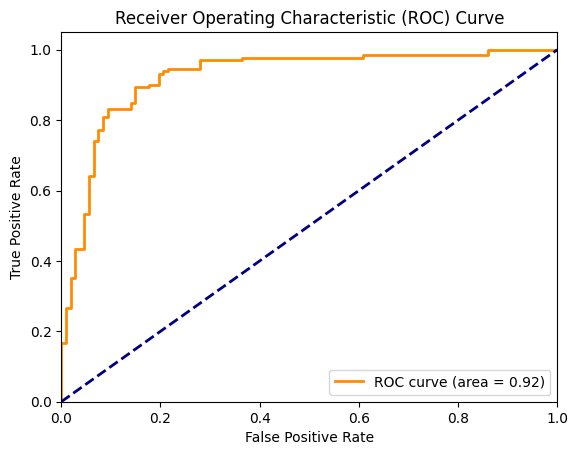

In [31]:
y_prob = kan_model.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")